### **Decorators**

Decorators are functions used to modify other functions, that is allowing the user to add new functionality to an existing object without modifying its structure. 

Let's start from an example of function that has another function as an argument:

In [1]:
def change_sign(f,x):
    return -f(x)

def my_f(x):
    return 7*x

x=3
print(change_sign(my_f,x))

-21


What if the we have more than one argument?

In [2]:
def change_sign(f,*args, **kwargs): #kwargs stands for keyword arguments
    return -f(*args, **kwargs)

def product(x,y):
    return x*y

y=4

print(change_sign(my_f,x))
print(change_sign(product,x,y))

-21
-12


This is a bit ugly though. Let's make the `change_sign` function return a function rather than the output. To do this, we need to create another, wrapping function inside `change_sign`.

In [3]:
def change_sign(f):
    def wrapper(*args, **kwargs):
        return -f(*args, **kwargs)
    return wrapper

minus_my_f = change_sign(my_f)

print(minus_my_f(x))


-21


Now we have a function that will modify any function to output the opposite sign value. However, we probably woudln't want to have to redefine all the functions we might need to use the change sign on. That's where decorator syntax comes in:

In [4]:
def change_sign(func):
    def wrapper(*args, **kwargs):
        return -func(*args, **kwargs)
    return wrapper

@change_sign
def my_f(x):
    return 7*x

@change_sign
def product(x,y):
    return x*y

print(my_f(x))
print(product(x,y))


-21
-12


The only problem we have now concerns the help:

In [5]:
help(my_f)
help(product)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)



We can fix this by using a decorator from the functools package

In [6]:
import functools

def change_sign(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        return -func(*args, **kwargs)
    return wrapper

@change_sign
def my_f(x):
    "hjhjhj"
    return 7*x

@change_sign
def product(x,y):
    return x*y

help(my_f)
help(product)


Help on function my_f in module __main__:

my_f(x)
    hjhjhj

Help on function product in module __main__:

product(x, y)



Here is one very useful example of the use of the decorators:

In [7]:
debug_flag = True

def debug(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        if debug_flag:
            arguments = [f"{a}" for a in args]
            karguments = [f"{k}={v}" for k,v in kwargs.items()]
            name = func.__name__
            print("Calling "+name+" with args: "+", ".join(arguments)+" and kwargs: "+", ".join(karguments))
            value = func(*args, **kwargs)
            print("Run function: "+name+", which output: "+repr(value))
            return value
        else:
            return func(*args, **kwargs)
    return wrapper

@debug
def my_f(x):
    return 7*x

print(my_f(2))

Calling my_f with args: 2 and kwargs: 
Run function: my_f, which output: 14
14


In [31]:
import functools
def check_empty(func):
    @functools.wraps(func)
    def wrapper(arg):
        if arg==[]:
            pass            #   return print("I don't work with empty arrays")
        else:
            return func(arg)
    return wrapper

@check_empty
def print_array(arr):
    '''I print arrays'''
    print(arr)

if __name__=="__main__":
    l=[1,2,3]
    m=[]
    print_array(l)
    print_array(m)

[1, 2, 3]


In [40]:
import functools
import numpy as np
import sympy as sp

def decor(func):
    @functools.wraps(func)
    def wrapper(array):
        if array==[]:
            return ("array is empty")
        else:
            return func(array)
    return wrapper

@decor
def print_array(arr):
    '''I print arrays'''
    print(arr)
if __name__=="__main__":
    l=[1,2,4]
    m=[]
    print_array(l)
    print_array(m)

[1, 2, 4]


In [34]:
import time 

def time_decorator(func):
    def wrapper(*args, **kwargs):
        time_point = time.time()
        output = func(*args, **kwargs)
        print("Function execution time: ", time.time() - time_point)
        return output
    return wrapper
    

@time_decorator
def sleep():
    time.sleep(3)

@time_decorator
def dot_product(a, b):
    return sum([a[i]*b[i] for i in range(len(a))])

if __name__ == "__main__":

    sleep()

    a = [1, 2, 3]
    b = [4, 5, 6]
    c = dot_product(a, b)

    print('Dot product: ', c)

Function execution time:  3.0072062015533447
Function execution time:  0.0
Dot product:  32


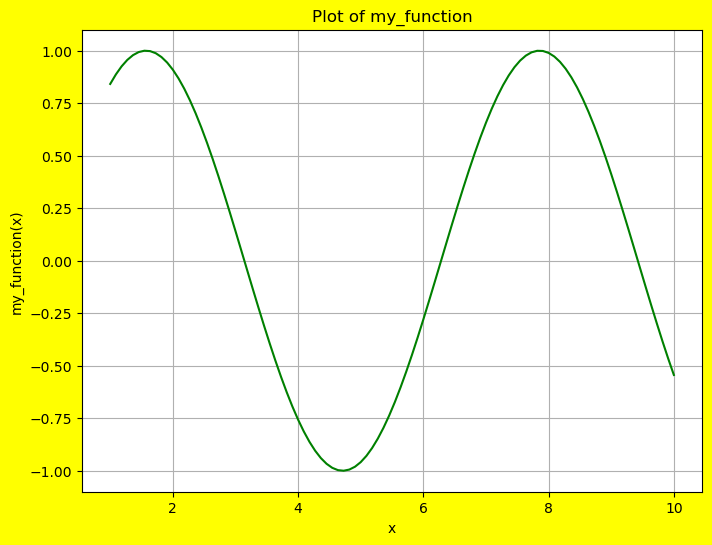

0.8414709848078965

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decorator(func):
    def wrapper(*args, **kwargs):
        # Generate 100 points between 1 and 10
        x = np.linspace(1, 10, 100)
        y = func(x)

        # Plotting
        plt.figure(figsize=(8, 6), facecolor='yellow')
        plt.plot(x, y, color='green')
        plt.title(f"Plot of {func.__name__}")
        plt.xlabel('x')
        plt.ylabel(f'{func.__name__}(x)')
        plt.grid(True)
        plt.show()

        return func(*args, **kwargs)
    return wrapper

# Example usage
@plot_decorator
def my_function(x):
    return np.sin(x)

# Call the decorated function
my_function(1)
 

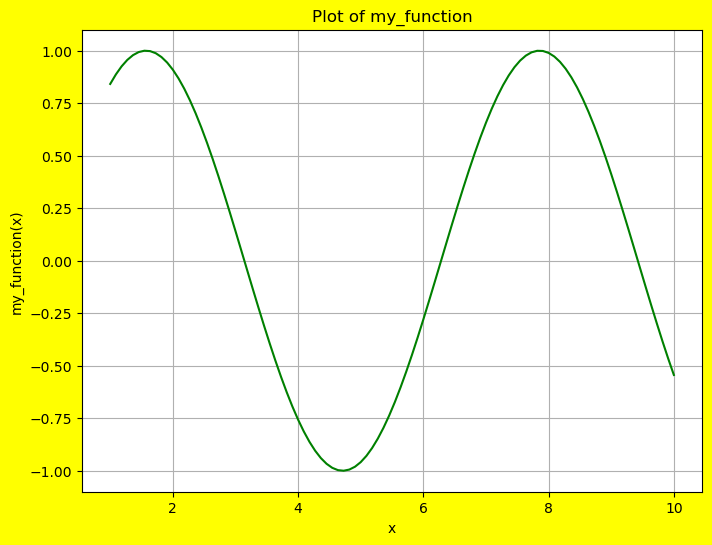

0.8414709848078965

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decorator(func):
    def wrapper(*args, **kwargs):
        # Generate 100 points between 1 and 10
        x = np.linspace(1, 10, 100)
        y = func(x)

        # Create a figure and axis object
        fig, ax = plt.subplots(figsize=(8, 6))
        fig.patch.set_facecolor('yellow')  # Set the background color of the figure

        # Plotting using the ax interface
        ax.plot(x, y, color='green')
        ax.set_title(f"Plot of {func.__name__}")
        ax.set_xlabel('x')
        ax.set_ylabel(f'{func.__name__}(x)')
        ax.grid(True)

        # Display the plot
        plt.show()

        return func(*args, **kwargs)
    return wrapper

# Example usage
@plot_decorator
def my_function(x):
    return np.sin(x)

# Call the decorated function
my_function(1)
 